In [ ]:
pip install keras

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Thu Sep 17 18:01:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    32W / 250W |    359MiB / 16280MiB |      1%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.__version__ 

'2.3.0'

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path= '/content/drive/My Drive/colab Dataset/train'
valid_path= '/content/drive/My Drive/colab Dataset/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg= VGG16(input_shape= IMAGE_SIZE+[3], weights='imagenet', include_top=False)

# resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# inception= InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights

for layer in vgg.layers:
  layer.trainable= False

# for layer in resnet.layers:
#     layer.trainable = False

# for layer in inception.layers:
#     layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/colab Dataset/train/*')

In [ ]:
sorted(folders)

['/content/drive/My Drive/colab Dataset/train/bmw',
 '/content/drive/My Drive/colab Dataset/train/lamborgini',
 '/content/drive/My Drive/colab Dataset/train/mercedes',
 '/content/drive/My Drive/colab Dataset/train/tesla']

In [ ]:
test_folders = glob('/content/drive/My Drive/colab Dataset/test/*')
test_folders

['/content/drive/My Drive/colab Dataset/test/mercedes',
 '/content/drive/My Drive/colab Dataset/test/tesla',
 '/content/drive/My Drive/colab Dataset/test/bmw',
 '/content/drive/My Drive/colab Dataset/test/lamborgini']

In [ ]:
# our layers - you can add more if you want

# x = Flatten()(resnet.output)

x= Flatten()(vgg.output)

# x = Flatten()(inception.output)

In [ ]:
vgg.input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [ ]:
vgg.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [ ]:
x

<tf.Tensor 'flatten/Reshape:0' shape=(None, 25088) dtype=float32>

In [ ]:
x= Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x= Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x= Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

# model = Model(inputs=resnet.input, outputs=prediction)

model= Model(inputs= vgg.input, outputs= prediction)

# model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
type(prediction)

tensorflow.python.framework.ops.Tensor

In [ ]:
prediction

<tf.Tensor 'dense_3/Softmax:0' shape=(None, 4) dtype=float32>

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(featurewise_center=True,
#                                    rotation_range=20,
#                                    width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                    rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/colab Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 278 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'bmw': 0, 'lamborgini': 1, 'mercedes': 2, 'tesla': 3}

In [ ]:
len(training_set)

18

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/colab Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 100 images belonging to 4 classes.


In [ ]:

len(test_set) # (totalimages/batch_size)

7

In [ ]:
test_set.class_indices

{'bmw': 0, 'lamborgini': 1, 'mercedes': 2, 'tesla': 3}

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch= len(training_set),
  validation_steps= len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
18/18 [==============================] - 261s 15s/step - loss: 13.5264 - accuracy: 0.2770 - val_loss: 1.6758 - val_accuracy: 0.3200
Epoch 2/100
18/18 [==============================] - 7s 374ms/step - loss: 2.2088 - accuracy: 0.2554 - val_loss: 1.6234 - val_accuracy: 0.2700
Epoch 3/100
18/18 [==============================] - 7s 371ms/step - loss: 1.4987 - accuracy: 0.4065 - val_loss: 1.0920 - val_accuracy: 0.6100
Epoch 4/100
18/18 [==============================] - 7s 370ms/step - loss: 1.2947 - accuracy: 0.4604 - val_loss: 1.0238 - val_accuracy: 0.5500
Epoch 5/100
18/18 [==============================] - 7s 371ms/step - loss: 0.9883 - accuracy: 0.5827 - val_loss: 0.9150 - val_accuracy: 0.6500
Epoch 6/100
18/18 [==============================] - 7s 373ms/step - loss: 0.9339 - accuracy: 0.6871 - val_loss: 0.8311 - val_accuracy: 0.7300
Epoch 7/100
18/18 [==============================] - 7s 384ms/ste

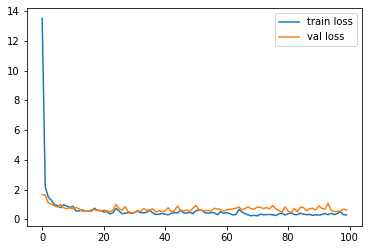

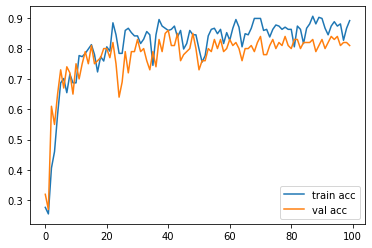

<Figure size 432x288 with 0 Axes>

In [ ]:
# By VGG16 architecture


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

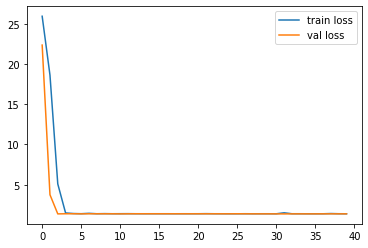

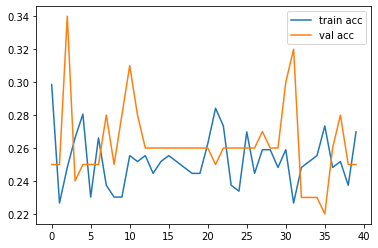

<Figure size 432x288 with 0 Axes>

In [ ]:
 b# By Resnet50 architecture


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save("/content/drive/My Drive/colab Dataset/vgg16_model.h5")
print("Saved model to disk")

Saved model to disk


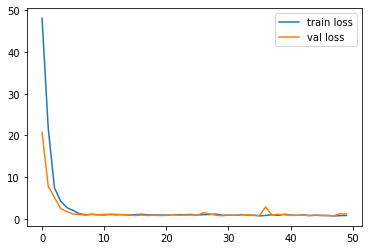

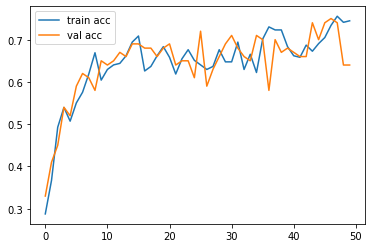

<Figure size 432x288 with 0 Axes>

In [ ]:
 # By Inception architecture


# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred= model.predict(test_set)

y_pred

array([[1.20179981e-01, 4.40179765e-01, 3.74802679e-01, 6.48375154e-02],
       [9.99988675e-01, 1.71156699e-07, 1.12208772e-05, 3.19605284e-08],
       [2.75759703e-06, 4.09216264e-05, 8.77558819e-07, 9.99955535e-01],
       [2.22384444e-09, 3.36779715e-10, 1.00000000e+00, 2.12808070e-11],
       [9.99999642e-01, 5.91412752e-10, 3.37108503e-07, 5.38227379e-11],
       [5.97981343e-05, 5.43128699e-05, 1.66369027e-05, 9.99869227e-01],
       [8.69622891e-05, 7.33049819e-05, 1.26409186e-05, 9.99827087e-01],
       [2.03296188e-02, 1.35059683e-02, 9.61165249e-01, 4.99918219e-03],
       [4.40502947e-04, 9.99018192e-01, 2.68395961e-04, 2.72896985e-04],
       [2.15223618e-02, 1.54131472e-01, 7.98504531e-01, 2.58415490e-02],
       [2.84400024e-02, 7.07604408e-01, 2.41009608e-01, 2.29459032e-02],
       [2.18708590e-02, 1.18021265e-01, 8.58942866e-01, 1.16492133e-03],
       [3.24723381e-03, 1.15315085e-02, 9.84034777e-01, 1.18657283e-03],
       [9.99921560e-01, 2.84915745e-06, 7.40639807e

In [ ]:
test_set

In [ ]:
import numpy as np
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
y_pred_class

array([1, 0, 3, 2, 0, 3, 3, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 3, 3, 2, 1,
       1, 3, 1, 3, 2, 3, 1, 0, 2, 1, 3, 1, 3, 1, 0, 0, 2, 1, 1, 2, 3, 2,
       2, 2, 2, 0, 0, 2, 3, 2, 3, 0, 2, 2, 0, 2, 2, 0, 3, 3, 0, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 0, 2, 3, 3, 0, 1, 2,
       1, 2, 1, 3, 0, 3, 0, 1, 2, 3, 3, 1])

In [ ]:
labels= training_set.class_indices
print(labels)

{'bmw': 0, 'lamborgini': 1, 'mercedes': 2, 'tesla': 3}


In [ ]:
for i in labels.values():
  print(i)

0
1
2
3


In [ ]:


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [ ]:
# img=image.load_img('/content/drive/My Drive/colab Dataset/test/tesla/jpg_94.jpg',target_size=(224,224))
# 
img=image.load_img('/content/drive/My Drive/colab Dataset/download.jpg', target_size=(224,224))

In [ ]:
x= image.img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
x=x/255
# z= model.predict(x)
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x, axis=0)
# print(x)
# img_data=preprocess_input(x)
# img_data.shape
x.shape

(1, 224, 224, 3)

In [ ]:
y_pred= model.predict(x)
y_pred

array([[0.1889977 , 0.45597205, 0.14884958, 0.2061807 ]], dtype=float32)

In [ ]:
a=np.argmax(y_pred, axis=1)
a

array([1])

In [ ]:
for key,value in labels.items():
  if a==value:
    print(key)

lamborgini


In [ ]:
vgg_model=load_model('/content/drive/My Drive/colab Dataset/vgg16_model.h5')

In [ ]:
img=image.load_img('/content/drive/My Drive/colab Dataset/train/bmw/jpg_30.jpg',target_size=(224,224))

In [ ]:
x= image.img_to_array(img)
x=x/255
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
# print(x)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
a= vgg_model.predict(img_data)
a

array([[4.6870941e-03, 3.1001908e-03, 9.9219066e-01, 2.1984353e-05]],
      dtype=float32)

In [ ]:
a=np.argmax(vgg_model.predict(img_data), axis=1)
a

array([2])

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/sudhanshukumar/Downloads/cat.11.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

In [ ]:
from PIL import Image
import numpy as np
img_w, img_h = 200, 200
data = np.zeros((img_h, img_w, 3), dtype=np.uint8)
data[100, 100] = [255, 0, 0]
print(data.shape)
# img = Image.fromarray(data, 'RGB')
# img.save('test.png')
# img.show()

(200, 200, 3)
